In [1]:
import numpy as np

## Creation of R matrix (User-Item rating matrix)

In [2]:
x = np.array([[5,0,4,0,3,3],
            [0,4,0,0,3,0],
            [3,0,0,3,0,0],
            [0,4,0,5,0,1]])

In [3]:
R = np.asmatrix(x)
R

matrix([[5, 0, 4, 0, 3, 3],
        [0, 4, 0, 0, 3, 0],
        [3, 0, 0, 3, 0, 0],
        [0, 4, 0, 5, 0, 1]])

## Initialization of f i.e. low rank

## U is No of users in User-Item rating matrix
## I is No of items User-Item rating matrix

In [4]:
U,I = R.shape
f = 3

In [5]:
number = np.random.RandomState(42)

## Factor matrices initialization randomly

In [6]:
p = number.rand(U,f)
q = number.rand(f,I)
'''p = np.array([[0.11,0.07,0.19],
            [0.09,0.16,0.19],
            [0.09,0.05,0.04],
            [0.03,0.13,0.18]])
q = np.array([[0.16,0.01,0.07,0.17,0.02,0.20],
             [0.18,0.19,0.10,0.05,0.18,0.15],
             [0.02,0.18,0.03,0.14,0.17,0.06]])'''

'p = np.array([[0.11,0.07,0.19],\n            [0.09,0.16,0.19],\n            [0.09,0.05,0.04],\n            [0.03,0.13,0.18]])\nq = np.array([[0.16,0.01,0.07,0.17,0.02,0.20],\n             [0.18,0.19,0.10,0.05,0.18,0.15],\n             [0.02,0.18,0.03,0.14,0.17,0.06]])'

In [7]:
P = np.asmatrix(p)
Q = np.asmatrix(q)

In [8]:
P

matrix([[0.37454012, 0.95071431, 0.73199394],
        [0.59865848, 0.15601864, 0.15599452],
        [0.05808361, 0.86617615, 0.60111501],
        [0.70807258, 0.02058449, 0.96990985]])

In [9]:
Q

matrix([[0.83244264, 0.21233911, 0.18182497, 0.18340451, 0.30424224,
         0.52475643],
        [0.43194502, 0.29122914, 0.61185289, 0.13949386, 0.29214465,
         0.36636184],
        [0.45606998, 0.78517596, 0.19967378, 0.51423444, 0.59241457,
         0.04645041]])

## Regularization Coefficient initialization

In [10]:
lambda_p = 0.1
lambda_q = 0.1

## Setting maximum training round

In [11]:
t = 1
max_training_round = 100

## Auxiliary matrix to determine Ui and Iu

In [12]:
W = R>0.01
W[W == True] = 1
W[W == False] = 0
# To be consistent with our Q matrix
W = W.astype(np.int64, copy=False)

## Counting no of users who rated item i

In [13]:
Ui = []
for iterator in range(I):
    Ui.append(W[:,iterator].sum())

## Counting no of items which was being rated by user u

In [14]:
Iu = []
for iterator in range(U):
    Iu.append(W[iterator].sum())

In [15]:
len(Ui)

6

In [16]:
len(Iu)

4

In [17]:
from sklearn.metrics import mean_squared_error

## RSNMF

In [18]:
error = []
diff_error = 10
while t <= max_training_round and diff_error > 0.00001:
    UserUp = np.zeros((U,f), dtype=float)
    UserDown = np.zeros((U,f), dtype=float)
    ItemUp = np.zeros((f,I), dtype=float)
    ItemDown = np.zeros((f,I), dtype=float)
    for u in range(U):
        for i in range(I):
            if(R[u,i] != 0):
                rui_cap = P[u,:]*Q[:,i]
                for k in range(f):
                    UserUp[u,k] = UserUp[u,k] + Q[k,i] * R[u,i]
                    UserDown[u,k] = UserDown[u,k] + Q[k,i] * rui_cap
                    ItemUp[k,i] = ItemUp[k,i] + P[u,k] * R[u,i]
                    ItemDown[k,i] = ItemDown[k,i] + P[u,k]*rui_cap
    for u in range(U):
        for k in range(f):
            UserDown[u,k] = UserDown[u,k] + Iu[u] * lambda_p * P[u,k]
            P[u,k] = P[u,k] * (UserUp[u,k]/UserDown[u,k])
    for i in range(I):
        for k in range(f):
            ItemDown[k,i] = ItemDown[k,i] + Ui[i] * lambda_q * Q[k,i]
            Q[k,i] = Q[k,i] * (ItemUp[k,i]/ItemDown[k,i])
    error.append(mean_squared_error(R,np.dot(P,Q)))
    if(t>2):
        diff_error = abs(error[t-3] - error[t-2])
    print('{}th epoch is completed'.format(t))
    t = t+1

1th epoch is completed
2th epoch is completed
3th epoch is completed
4th epoch is completed
5th epoch is completed
6th epoch is completed
7th epoch is completed
8th epoch is completed
9th epoch is completed
10th epoch is completed
11th epoch is completed
12th epoch is completed
13th epoch is completed
14th epoch is completed
15th epoch is completed
16th epoch is completed
17th epoch is completed
18th epoch is completed
19th epoch is completed
20th epoch is completed
21th epoch is completed
22th epoch is completed
23th epoch is completed
24th epoch is completed
25th epoch is completed
26th epoch is completed
27th epoch is completed
28th epoch is completed
29th epoch is completed
30th epoch is completed
31th epoch is completed
32th epoch is completed
33th epoch is completed
34th epoch is completed
35th epoch is completed
36th epoch is completed
37th epoch is completed
38th epoch is completed
39th epoch is completed
40th epoch is completed
41th epoch is completed
42th epoch is completed
4

In [19]:
#print('Total error of rated movies: {}'.format(error[t])

## Error graph

In [20]:
import matplotlib.pyplot as plt

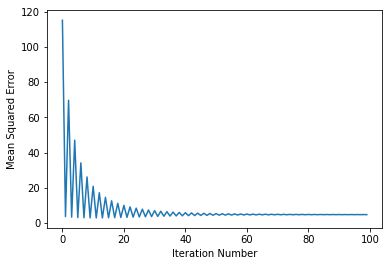

In [21]:
plt.plot(error);
plt.xlabel('Iteration Number');
plt.ylabel('Mean Squared Error');

In [22]:
'''x = np.array([[0,0,5,0,2,0,0],
            [0,2,0,0,0,3,0],
            [0,3,0,0,4,0,1],
            [0,0,5,3,1,0,2],
             [0,5,4,0,0,4,0]])
test = np.asmatrix(x)'''

'x = np.array([[0,0,5,0,2,0,0],\n            [0,2,0,0,0,3,0],\n            [0,3,0,0,4,0,1],\n            [0,0,5,3,1,0,2],\n             [0,5,4,0,0,4,0]])\ntest = np.asmatrix(x)'

In [23]:
P

matrix([[0.96313158, 1.62461215, 0.93648865],
        [1.08043541, 0.74498393, 1.46235227],
        [0.45624383, 0.69345755, 1.06716721],
        [0.80487633, 0.10903275, 1.85940943]])

In [24]:
Q

matrix([[1.00658536, 1.01012863, 0.80822169, 0.92052775, 0.82991862,
         0.5845547 ],
        [1.65587638, 0.52351105, 1.45384994, 0.31115513, 0.76062959,
         1.26112413],
        [1.23131951, 1.63341722, 0.81389428, 2.15798087, 0.97309439,
         0.23721325]])

In [25]:
np.dot(P,Q)

matrix([[4.81274777, 3.35306587, 3.90256885, 3.41302034, 2.94634076,
         2.8339882 ],
        [4.12177464, 3.87001743, 3.14652631, 4.38210457, 2.88633708,
         1.91798014],
        [2.92155213, 2.56702693, 2.24549065, 2.9386844 , 1.944564  ,
         1.39438172],
        [3.28024858, 3.90729983, 2.32239844, 4.78740707, 2.56029627,
         1.04907461]])